# 1. Imports

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Configurar para exibir todas as linhas
pd.set_option('display.max_rows', None)

import warnings

# Suprimir todos os warnings
warnings.filterwarnings('ignore')

# Se você também quiser ver todas as linhas, pode usar:
#pd.set_option('display.max_rows', None)

# 2. Carga de dados

In [2]:
base_dir = '../data/'

In [3]:
df = pd.read_csv(base_dir + 'PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

# 3. Checando dados ausentes

In [4]:
df.dtypes

INSTITUICAO_ENSINO_ALUNO_2020     object
NOME                              object
IDADE_ALUNO_2020                  object
ANOS_PM_2020                      object
FASE_TURMA_2020                   object
PONTO_VIRADA_2020                 object
INDE_2020                         object
INDE_CONCEITO_2020                object
PEDRA_2020                        object
DESTAQUE_IEG_2020                 object
DESTAQUE_IDA_2020                 object
DESTAQUE_IPV_2020                 object
IAA_2020                          object
IEG_2020                          object
IPS_2020                          object
IDA_2020                          object
IPP_2020                          object
IPV_2020                          object
IAN_2020                          object
FASE_2021                        float64
TURMA_2021                        object
INSTITUICAO_ENSINO_ALUNO_2021     object
SINALIZADOR_INGRESSANTE_2021      object
PEDRA_2021                        object
INDE_2021       

<Axes: >

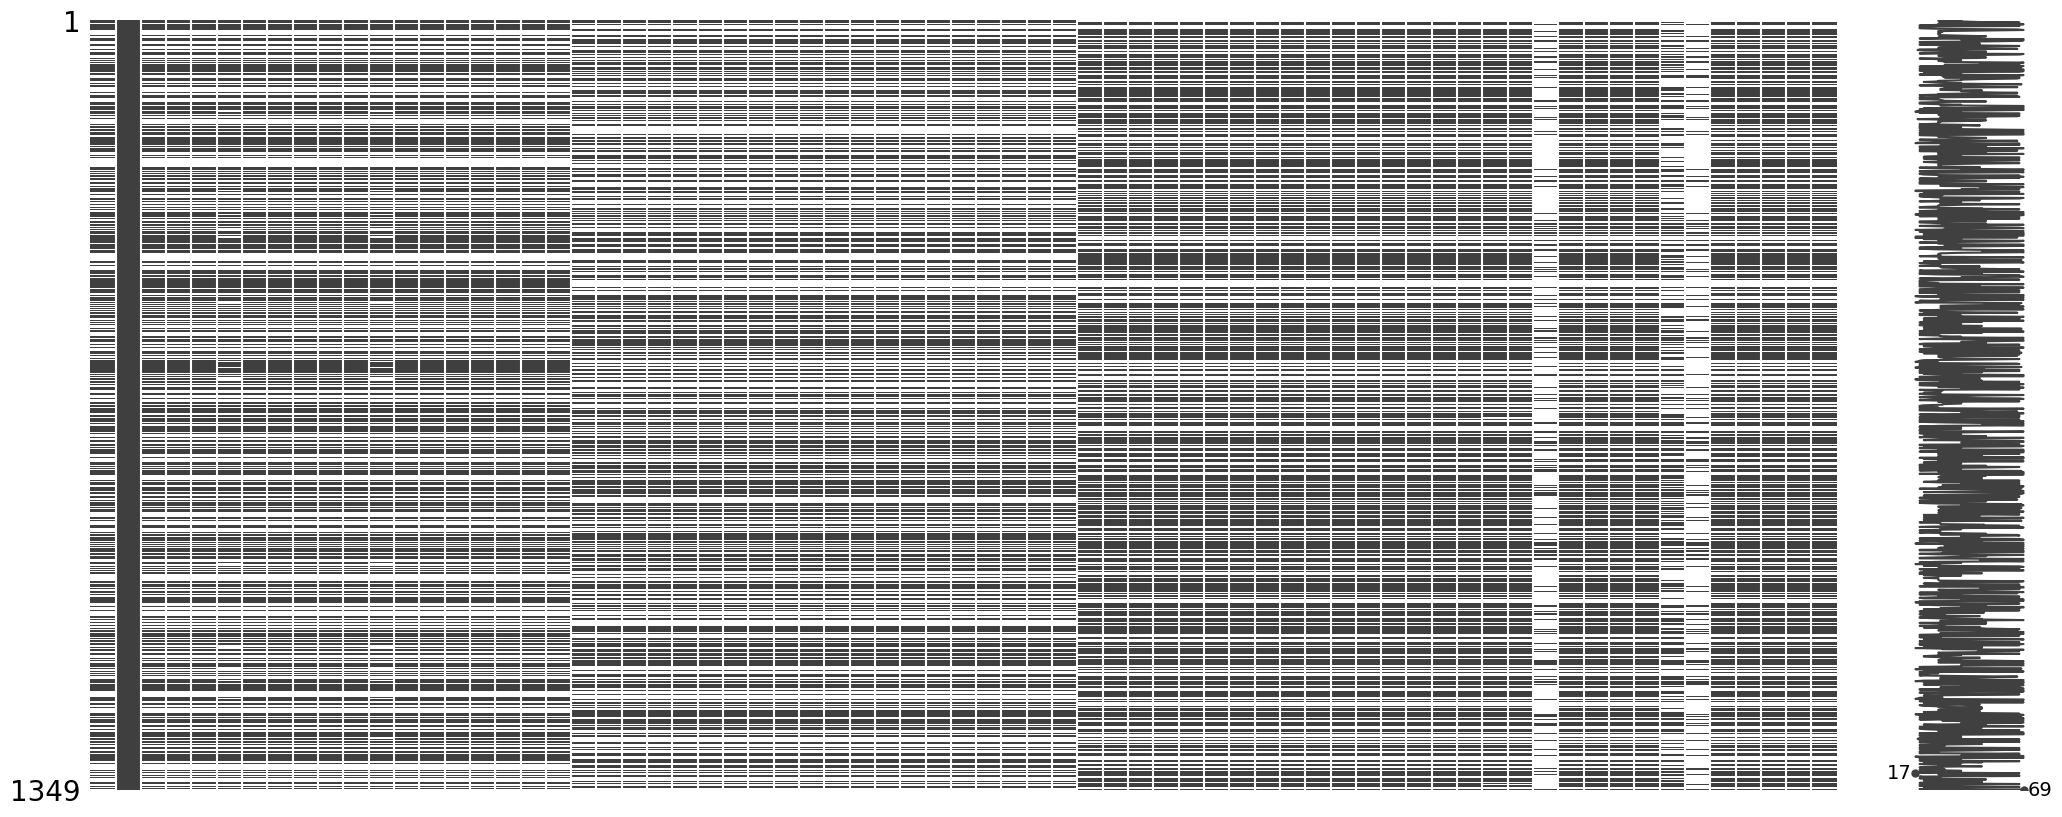

In [5]:
msno.matrix(df)

A base de dados apresenta lacunas em diversas áreas, o que é evidenciado pela presença de três blocos distintos no gráfico. Essa característica está alinhada com a estrutura do conjunto de dados, onde colunas equivalentes são repetidas para cada ano. Isso resulta em uma quantidade significativa de valores ausentes em certas colunas, enquanto outras apresentam dados completos. Tal padrão indica a mudança no comportamento dos dados ao longo do período.

# 4. Modelando a base

Para otimizar a análise e melhorar a qualidade das visualizações, optamos por segmentar a base de dados em três subconjuntos, correspondentes a cada ano. Esta estratégia permite a padronização dos nomes das colunas e a uniformização da estrutura dos dados. Tal ajuste é essencial para garantir a compatibilidade do layout com as ferramentas de visualização.

In [6]:
# Criar listas de colunas para cada ano, incluindo a coluna 'NOME'
colunas_2020 = [col for col in df.columns if '_2020' in col] + ['NOME']
colunas_2021 = [col for col in df.columns if '_2021' in col] + ['NOME']
colunas_2022 = [col for col in df.columns if '_2022' in col] + ['NOME']

# Criar DataFrames separados para cada ano
df_2020 = df[colunas_2020].copy()
df_2021 = df[colunas_2021].copy()
df_2022 = df[colunas_2022].copy()

# Renomear colunas para remover o ano dos nomes
df_2020.columns = [col.replace('_2020', '') for col in df_2020.columns]
df_2021.columns = [col.replace('_2021', '') for col in df_2021.columns]
df_2022.columns = [col.replace('_2022', '') for col in df_2022.columns]

In [7]:
df_2020.columns

Index(['INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM', 'FASE_TURMA',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'NOME'],
      dtype='object')

In [8]:
df_2021.columns

Index(['FASE', 'TURMA', 'INSTITUICAO_ENSINO_ALUNO', 'SINALIZADOR_INGRESSANTE',
       'PEDRA', 'INDE', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP', 'REC_EQUIPE_1',
       'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4', 'PONTO_VIRADA', 'IPV',
       'IAN', 'NIVEL_IDEAL', 'DEFASAGEM', 'NOME'],
      dtype='object')

In [9]:
df_2022.columns

Index(['FASE', 'TURMA', 'ANO_INGRESSO', 'BOLSISTA', 'INDE', 'CG', 'CF', 'CT',
       'PEDRA', 'DESTAQUE_IEG', 'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG',
       'IPS', 'IDA', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'IPP',
       'REC_AVA_1', 'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'INDICADO_BOLSA',
       'PONTO_VIRADA', 'IPV', 'IAN', 'NIVEL_IDEAL', 'NOME'],
      dtype='object')

In [10]:
df_2020['ano'] = '2020'
df_2021['ano'] = '2021'
df_2022['ano'] = '2022'

df = pd.concat([df_2020,df_2021,df_2022],axis=0).copy()
df.columns

Index(['INSTITUICAO_ENSINO_ALUNO', 'IDADE_ALUNO', 'ANOS_PM', 'FASE_TURMA',
       'PONTO_VIRADA', 'INDE', 'INDE_CONCEITO', 'PEDRA', 'DESTAQUE_IEG',
       'DESTAQUE_IDA', 'DESTAQUE_IPV', 'IAA', 'IEG', 'IPS', 'IDA', 'IPP',
       'IPV', 'IAN', 'NOME', 'ano', 'FASE', 'TURMA', 'SINALIZADOR_INGRESSANTE',
       'REC_EQUIPE_1', 'REC_EQUIPE_2', 'REC_EQUIPE_3', 'REC_EQUIPE_4',
       'NIVEL_IDEAL', 'DEFASAGEM', 'ANO_INGRESSO', 'BOLSISTA', 'CG', 'CF',
       'CT', 'NOTA_PORT', 'NOTA_MAT', 'NOTA_ING', 'QTD_AVAL', 'REC_AVA_1',
       'REC_AVA_2', 'REC_AVA_3', 'REC_AVA_4', 'INDICADO_BOLSA'],
      dtype='object')

In [11]:
df.to_csv('../data/base_tratada.csv', index=None)

# 5. EDA

## 5.1 Perfil dos Estudantes: Idade, Tempo na ONG e Fase de Aprendizado

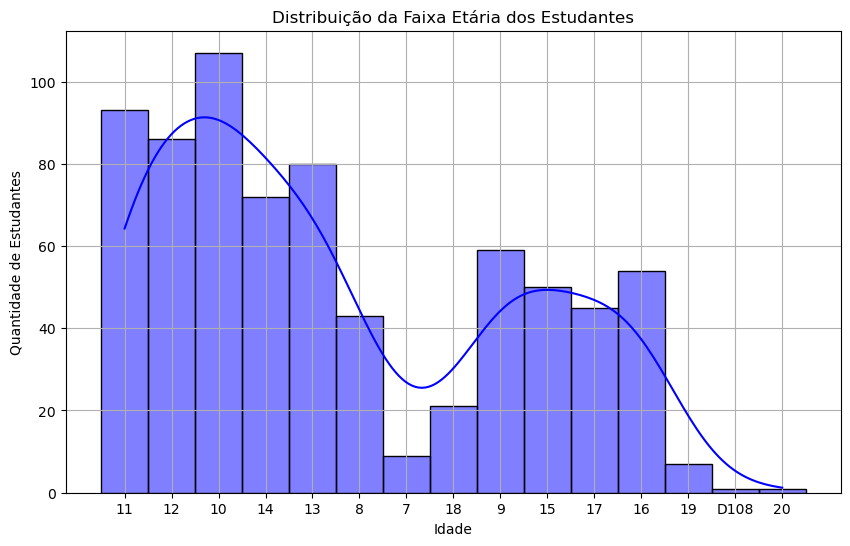

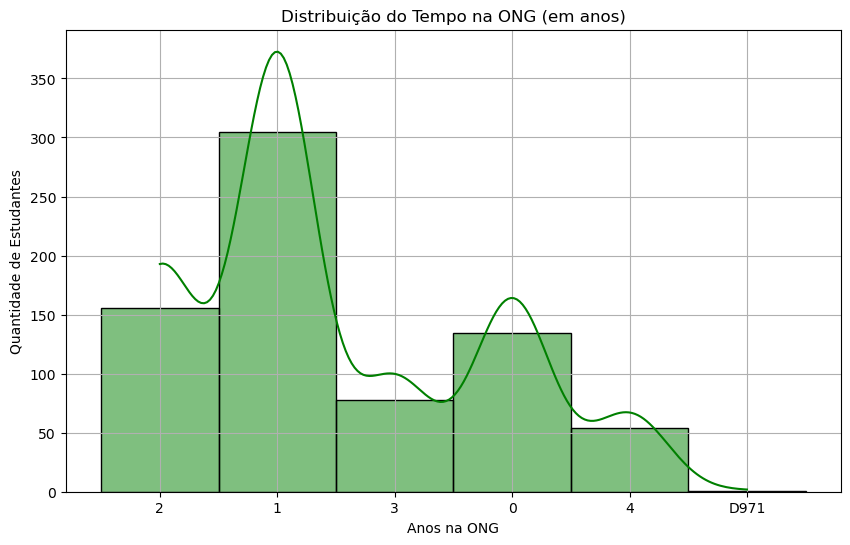

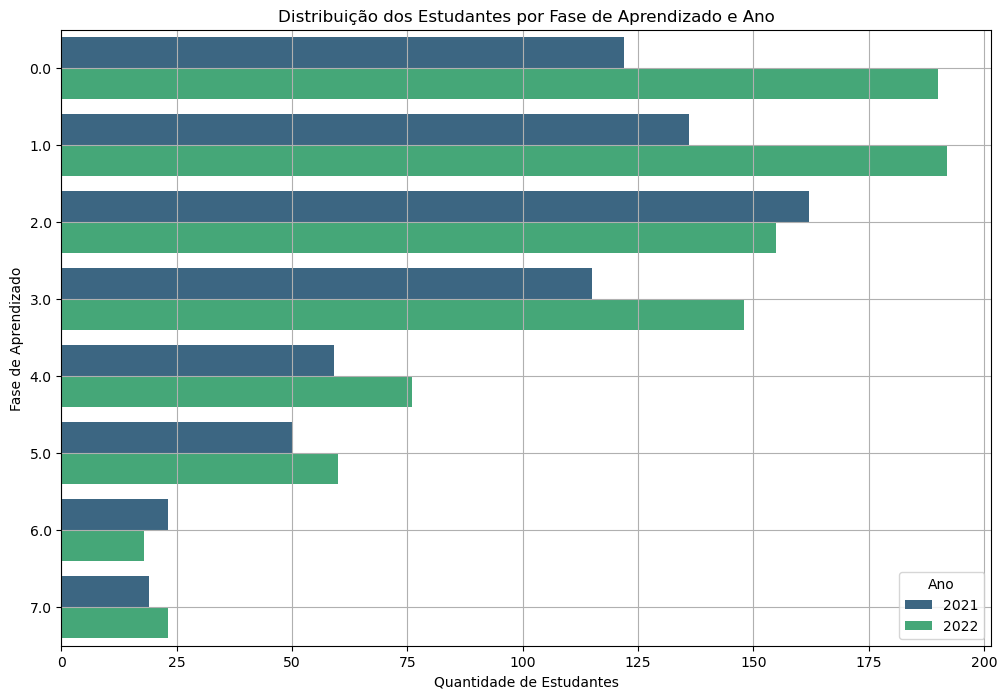

In [12]:
# Gráfico de faixa etária (com kde para visualizar a densidade)
# Remover duplicatas de colunas e limpar possíveis duplicatas de índices
df_clean = df.drop_duplicates().copy()

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['IDADE_ALUNO'].dropna(), bins=10, kde=True, color='blue')
plt.title('Distribuição da Faixa Etária dos Estudantes')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Estudantes')
plt.grid(True)
plt.show()

# Gráfico de tempo na ONG (com kde para densidade)
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['ANOS_PM'].dropna(), bins=10, kde=True, color='green')
plt.title('Distribuição do Tempo na ONG (em anos)')
plt.xlabel('Anos na ONG')
plt.ylabel('Quantidade de Estudantes')
plt.grid(True)
plt.show()



# Remover linhas com valores nulos na coluna 'FASE'
df_clean = df_clean.dropna(subset=['FASE'])

# Converter ano para tipo categórico se não estiver
df_clean['ano'] = df_clean['ano'].astype('category')

# Gráfico da fase de aprendizado segmentado por ano
plt.figure(figsize=(12, 8))
sns.countplot(y='FASE', hue='ano', data=df_clean, palette='viridis')
plt.title('Distribuição dos Estudantes por Fase de Aprendizado e Ano')
plt.xlabel('Quantidade de Estudantes')
plt.ylabel('Fase de Aprendizado')
plt.legend(title='Ano')
plt.grid(True)
plt.show()

## 5.2 Distribuição de Bolsistas

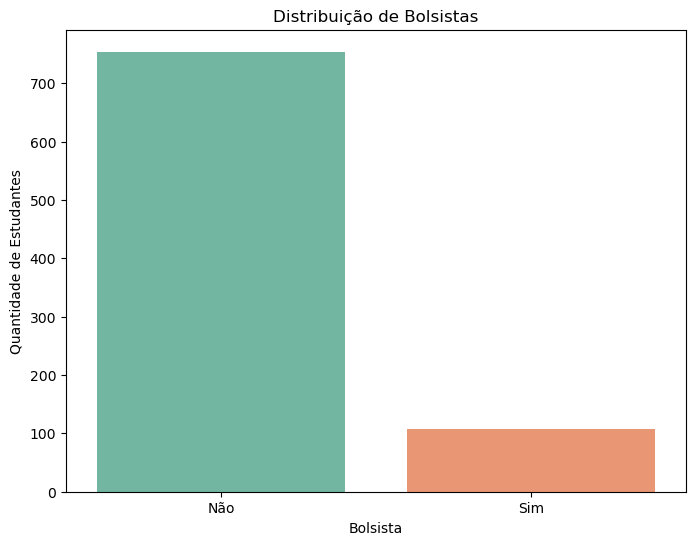

BOLSISTA
Não    754
Sim    108
Name: count, dtype: int64


In [13]:
# Remover duplicatas de colunas e limpar possíveis duplicatas de índices
df_clean = df.loc[:, ~df.columns.duplicated()].drop_duplicates().copy()

# Filtrar apenas as respostas "Sim" e "Não" na coluna BOLSISTA
df_bolsistas = df_clean[df_clean['BOLSISTA'].isin(['Sim', 'Não'])]

# Gráfico da distribuição de bolsistas (considerando apenas Sim e Não)
plt.figure(figsize=(8, 6))
sns.countplot(x='BOLSISTA', data=df_bolsistas, palette='Set2')
plt.title('Distribuição de Bolsistas')
plt.xlabel('Bolsista')
plt.ylabel('Quantidade de Estudantes')
plt.show()

# Exibir a quantidade de bolsistas
print(df_bolsistas['BOLSISTA'].value_counts())

## 5.3 Evolução do Desempenho Acadêmico

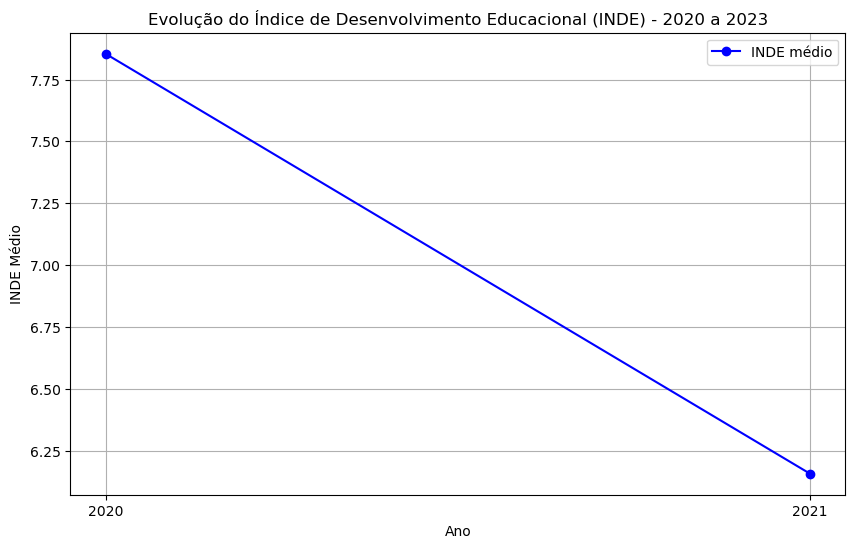

<Figure size 1000x600 with 0 Axes>

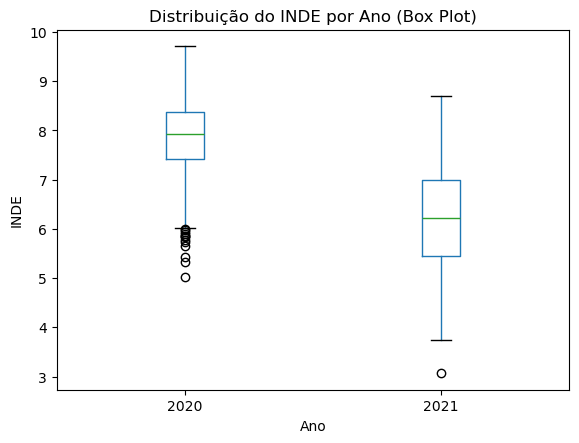

In [14]:
# Limpar os dados e converter a coluna de INDE para numérica
df['INDE'] = pd.to_numeric(df['INDE'], errors='coerce')

# Criar uma coluna "Ano" para identificar o período de tempo
df['ANO'] = pd.to_datetime(df['DESTAQUE_IEG'].str.extract(r'(\d{4})')[0], errors='coerce')

# Remover valores nulos da coluna 'ANO' e 'INDE'
df_cleaned = df.dropna(subset=['ANO', 'INDE'])

# Agrupar a média do INDE por ano
evolucao_inde = df_cleaned.groupby(df_cleaned['ANO'].dt.year)['INDE'].mean()

# Criar gráfico de linha da evolução do INDE
plt.figure(figsize=(10,6))
plt.plot(evolucao_inde.index, evolucao_inde.values, marker='o', color='b', linestyle='-', label='INDE médio')
plt.title('Evolução do Índice de Desenvolvimento Educacional (INDE) - 2020 a 2023')
plt.xlabel('Ano')
plt.ylabel('INDE Médio')
plt.grid(True)
plt.xticks(evolucao_inde.index)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
df_cleaned['ANO'] = df_cleaned['ANO'].dt.year  # Converter a coluna de ano para formato de ano

# Criar o boxplot do INDE para cada ano
df_cleaned.boxplot(column='INDE', by='ANO', grid=False)
plt.title('Distribuição do INDE por Ano (Box Plot)')
plt.suptitle('')  # Remover título extra
plt.xlabel('Ano')
plt.ylabel('INDE')
plt.show()

## 5.4 Engajamento e Ponto de Virada

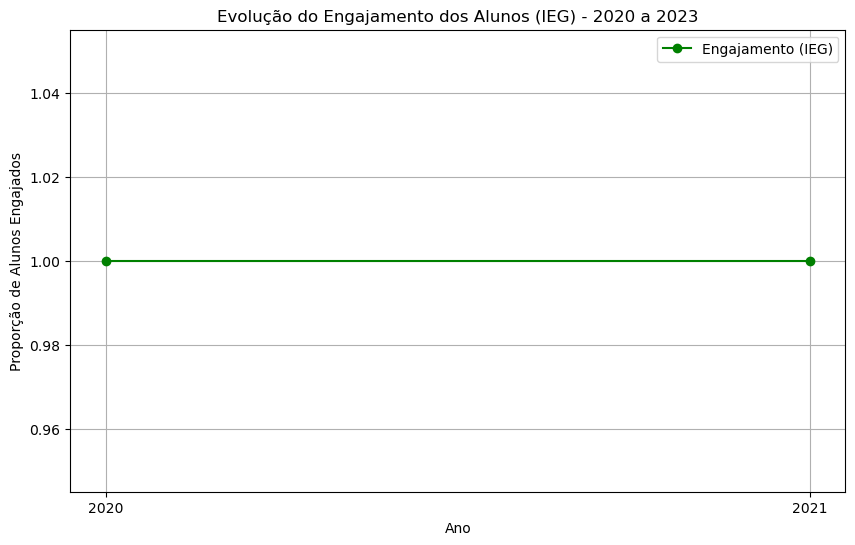

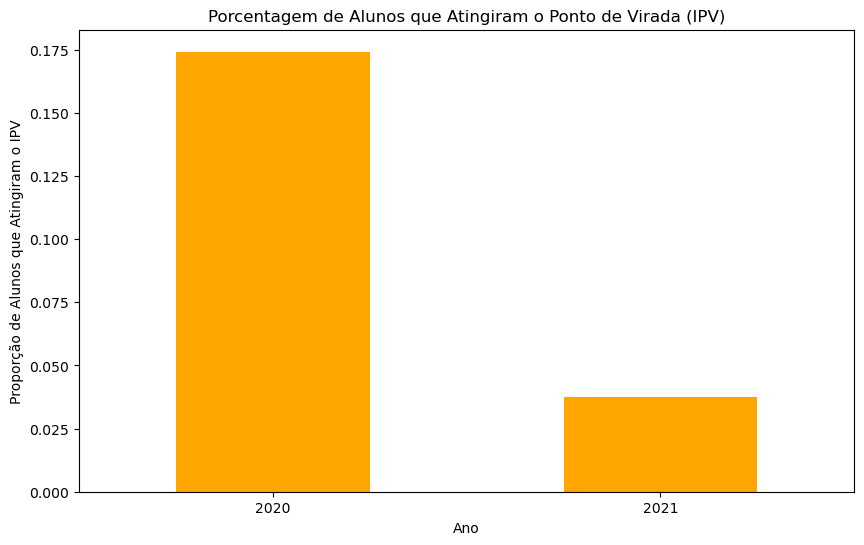

In [15]:
# Gráfico 1: Engajamento dos Alunos (IEG)

# Extraindo o indicador de engajamento IEG (assumindo que esteja relacionado a DESTAQUE_IEG)
# Para essa análise, vamos contar quantos alunos tiveram destaque em cada ano

# Limpar os dados relacionados ao destaque e criar uma variável que indica engajamento (IEG)
df_cleaned['IEG'] = df_cleaned['DESTAQUE_IEG'].notnull().astype(int)

# Agrupar a média do engajamento (IEG) por ano
engajamento_ieg = df_cleaned.groupby('ANO')['IEG'].mean()

# Criar gráfico de linha da evolução do IEG
plt.figure(figsize=(10,6))
plt.plot(engajamento_ieg.index, engajamento_ieg.values, marker='o', color='g', linestyle='-', label='Engajamento (IEG)')
plt.title('Evolução do Engajamento dos Alunos (IEG) - 2020 a 2023')
plt.xlabel('Ano')
plt.ylabel('Proporção de Alunos Engajados')
plt.grid(True)
plt.xticks(engajamento_ieg.index)
plt.legend()
plt.show()

# Gráfico 2: Ponto de Virada (IPV)

# Criar uma variável que indica se o aluno atingiu o ponto de virada (IPV)
df_cleaned['IPV'] = df_cleaned['PONTO_VIRADA'].apply(lambda x: 1 if x == 'Sim' else 0)

# Agrupar a porcentagem de alunos que atingiram o ponto de virada por ano
ponto_virada_ipv = df_cleaned.groupby('ANO')['IPV'].mean()

# Criar gráfico de barras da porcentagem de alunos que atingiram o ponto de virada
plt.figure(figsize=(10,6))
ponto_virada_ipv.plot(kind='bar', color='orange')
plt.title('Porcentagem de Alunos que Atingiram o Ponto de Virada (IPV)')
plt.xlabel('Ano')
plt.ylabel('Proporção de Alunos que Atingiram o IPV')
plt.xticks(rotation=0)
plt.show()

## 5.5 Impacto Psicossocial

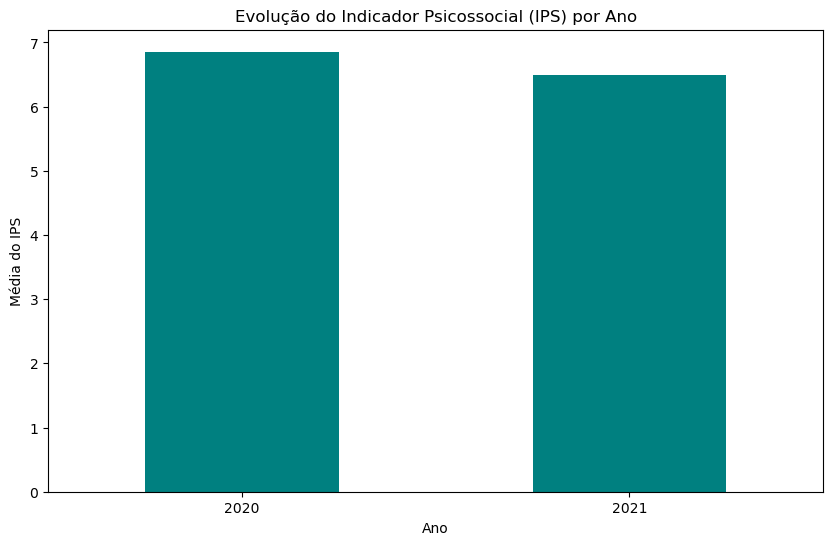

<Figure size 1000x600 with 0 Axes>

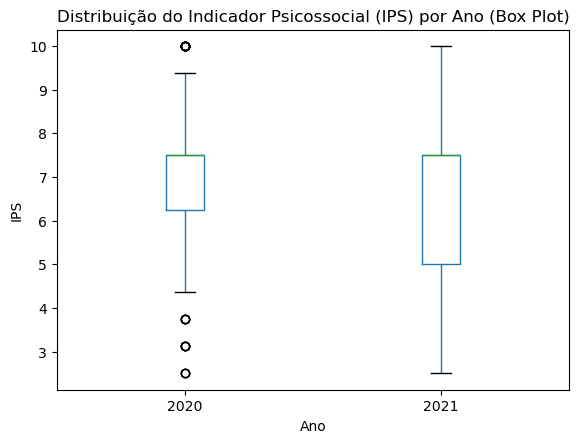

In [16]:
# Converter a coluna IPS para numérico, forçando a conversão e substituindo erros por NaN
df_cleaned['IPS'] = pd.to_numeric(df_cleaned['IPS'], errors='coerce')

# Recalcular a média de IPS por ano, ignorando valores NaN
ips_by_year = df_cleaned.groupby('ANO')['IPS'].mean()

# Criar gráfico de barras para o IPS por ano
plt.figure(figsize=(10,6))
ips_by_year.plot(kind='bar', color='teal')
plt.title('Evolução do Indicador Psicossocial (IPS) por Ano')
plt.xlabel('Ano')
plt.ylabel('Média do IPS')
plt.xticks(rotation=0)
plt.show()

# Criar o box plot do IPS por ano
plt.figure(figsize=(10,6))
df_cleaned.boxplot(column='IPS', by='ANO', grid=False)
plt.title('Distribuição do Indicador Psicossocial (IPS) por Ano (Box Plot)')
plt.suptitle('')  # Remover o título extra
plt.xlabel('Ano')
plt.ylabel('IPS')
plt.show()

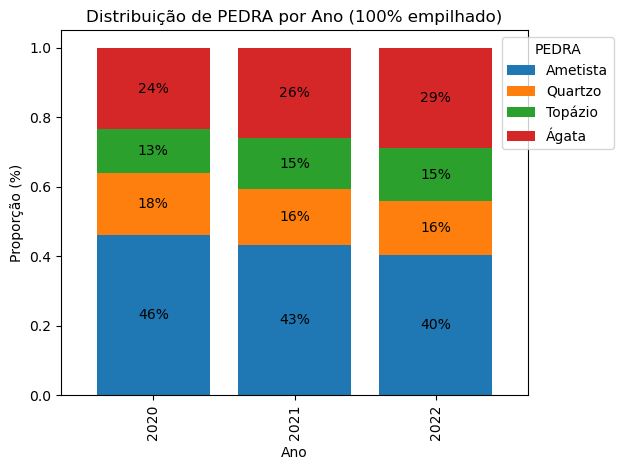

In [17]:
# Lista de pedras válidas
pedras_validas = ['Ametista', 'Quartzo', 'Topázio', 'Ágata']

# Filtrar o DataFrame para incluir apenas as pedras válidas
df_filtrado = df[df['PEDRA'].isin(pedras_validas)]

# Etapa 1: Criar uma tabela de contingência (crosstab) da distribuição das pedras por ano
contagem_pedra_ano = pd.crosstab(df_filtrado['ano'], df_filtrado['PEDRA'])

# Etapa 2: Normalizar a tabela de contingência para que cada ano some 100% (divisão linha a linha)
contagem_pedra_ano_pct = contagem_pedra_ano.div(contagem_pedra_ano.sum(axis=1), axis=0)

# Etapa 3: Criar o gráfico de barras empilhadas com ajustes
ax = contagem_pedra_ano_pct.plot(kind='bar', stacked=True, width=0.8)  # Reduzindo a largura das barras

# Adicionar rótulos de percentual (multiplicando os valores por 100 para exibir corretamente)
for container in ax.containers:
    labels = [f'{v * 100:.0f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Ajustar a posição da legenda para o lado direito
plt.legend(title='PEDRA', loc='upper right', bbox_to_anchor=(1.2, 1))

# Adicionar título e legendas
plt.title('Distribuição de PEDRA por Ano (100% empilhado)')
plt.ylabel('Proporção (%)')
plt.xlabel('Ano')

# Ajustar o layout para que tudo se encaixe
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [18]:
import pandas as pd

# Supondo que você já tenha o DataFrame com as colunas 'ano' e 'PEDRA'
# df = pd.DataFrame({
#     'ano': [2020, 2020, 2021, 2021, 2022, 2022],
#     'PEDRA': ['Ametista', 'Quartzo', 'Ametista', 'Ametista', 'Quartzo', 'Topázio']
# })

# Filtrar para incluir apenas as pedras válidas
pedras_validas = ['Ametista', 'Quartzo', 'Topázio', 'Ágata']
df_filtrado = df[df['PEDRA'].isin(pedras_validas)]

# Criar uma tabela agrupando por 'ano' e 'PEDRA', e contando a quantidade de alunos
tabela_pedras_ano = df_filtrado.groupby(['ano', 'PEDRA']).size().reset_index(name='Quantidade_Alunos')

# Exibir a tabela
tabela_pedras_ano.T

,0,1,2,3,4,5,6,7,8,9,10,11
ano,2020,2020,2020,2020,2021,2021,2021,2021,2022,2022,2022,2022
PEDRA,Ametista,Quartzo,Topázio,Ágata,Ametista,Quartzo,Topázio,Ágata,Ametista,Quartzo,Topázio,Ágata
Quantidade_Alunos,336,128,92,171,295,110,101,178,348,134,130,250


In [19]:
df.groupby(['PONTO_VIRADA', 'ano'])[['PONTO_VIRADA']].count()

PONTO_VIRADA
PONTO_VIRADA ano               
#NULO!       2021             2
D9600        2020             1
Não          2020           607
             2021           576
             2022           749
Sim          2020            94
             2021           108
             2022           113

In [20]:
df.head()

,INSTITUICAO_ENSINO_ALUNO,IDADE_ALUNO,ANOS_PM,FASE_TURMA,PONTO_VIRADA,INDE,INDE_CONCEITO,PEDRA,DESTAQUE_IEG,DESTAQUE_IDA,DESTAQUE_IPV,IAA,IEG,IPS,IDA,IPP,IPV,IAN,NOME,ano,FASE,TURMA,SINALIZADOR_INGRESSANTE,REC_EQUIPE_1,REC_EQUIPE_2,REC_EQUIPE_3,REC_EQUIPE_4,NIVEL_IDEAL,DEFASAGEM,ANO_INGRESSO,BOLSISTA,CG,CF,CT,NOTA_PORT,NOTA_MAT,NOTA_ING,QTD_AVAL,REC_AVA_1,REC_AVA_2,REC_AVA_3,REC_AVA_4,INDICADO_BOLSA,ANO
0,Escola Pública,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,ALUNO-1,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALUNO-2,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,Escola Pública,12,2,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,ALUNO-3,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01
3,Escola Pública,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,ALUNO-4,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01
4,Escola Pública,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,ALUNO-5,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01


In [22]:
df.dtypes

INSTITUICAO_ENSINO_ALUNO            object
IDADE_ALUNO                         object
ANOS_PM                             object
FASE_TURMA                          object
PONTO_VIRADA                        object
INDE                               float64
INDE_CONCEITO                       object
PEDRA                               object
DESTAQUE_IEG                        object
DESTAQUE_IDA                        object
DESTAQUE_IPV                        object
IAA                                 object
IEG                                 object
IPS                                 object
IDA                                 object
IPP                                 object
IPV                                 object
IAN                                 object
NOME                                object
ano                                 object
FASE                               float64
TURMA                               object
SINALIZADOR_INGRESSANTE             object
REC_EQUIPE_